In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats as stats
import seaborn as sns
%matplotlib inline

In [7]:
sales_data= pd.read_csv('SalesData.csv')

In [5]:
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

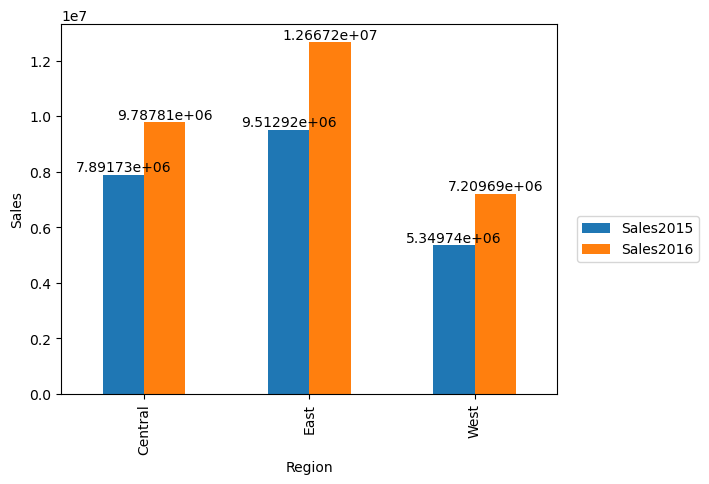

In [407]:
sum1 = sales_data.groupby('Region')[['Sales2015','Sales2016']].sum()
sum_bar = sum1.plot(kind='bar',ylabel = 'Sales')
plt.legend(bbox_to_anchor=(1.3,0.5))

for container in sum_bar.containers:
    sum_bar.bar_label(container)
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016.Visualize it using a Pie Chart

In [11]:
sum1= sales_data.groupby('Region')['Sales2016'].sum()
sum1

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

([<matplotlib.patches.Wedge at 0x197c74ad950>,
 [Text(0.5601011754729365, 0.9467241801252543, ''),
  Text(-1.0592537591761817, -0.2966167117192283, ''),
  Text(0.7946393928910669, -0.7606235831643119, '')])

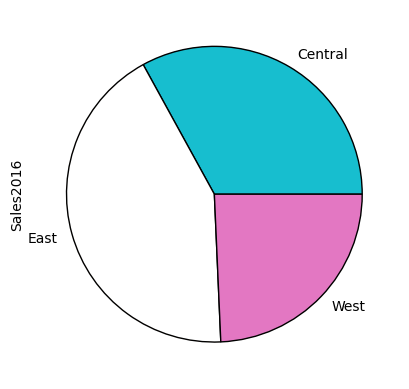

In [405]:
sum1= sales_data.groupby('Region')['Sales2016'].sum()
sum1.plot(kind = 'pie')
colors = ['#17becf','w','#e377c2']
plt.pie(sum1,colors=colors,wedgeprops ={'edgecolor':'black'})

([<matplotlib.patches.Wedge at 0x197fa147fd0>,
 [Text(0.4754573723051094, 0.9919376427582133, ''),
  Text(-1.2165295160954068, -0.4583185971228701, ''),
  Text(1.0138915840595395, -0.8136484841583852, '')],
 [Text(0.25934038489369604, 0.5410568960499345, '33.0%'),
  Text(-0.7486335483664041, -0.2820422136140739, '42.7%'),
  Text(0.623933282498178, -0.5007067594820832, '24.3%')])

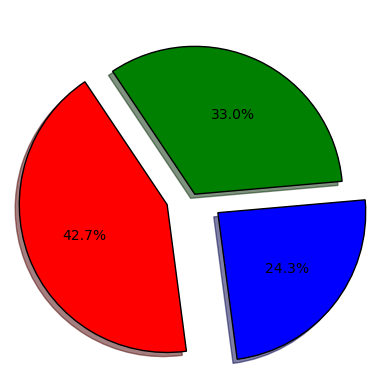

In [23]:
plt.pie(sum1,autopct = '%.1f%%',explode=[0,0.2,0.2],colors='grb',shadow = True,wedgeprops ={'edgecolor':'black'},startangle = 5)
#ax = fig.add_subplot(projection='3d')

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers 

<Axes: xlabel='Tier'>

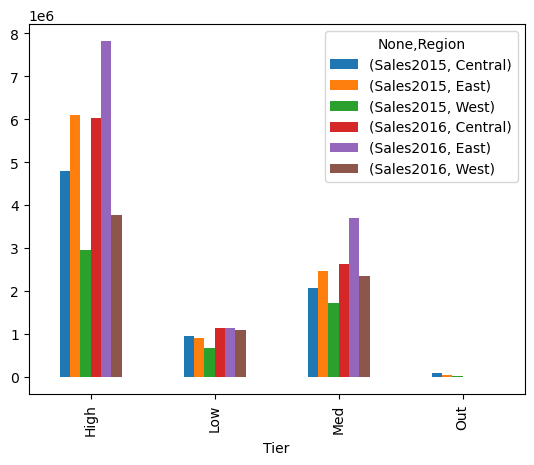

In [191]:
temp = pd.pivot_table(sales_data,index = 'Tier',columns = 'Region',values = ['Sales2015','Sales2016'], aggfunc = 'sum')
temp.plot(kind ='bar')

<Axes: xlabel='Tier,Region'>

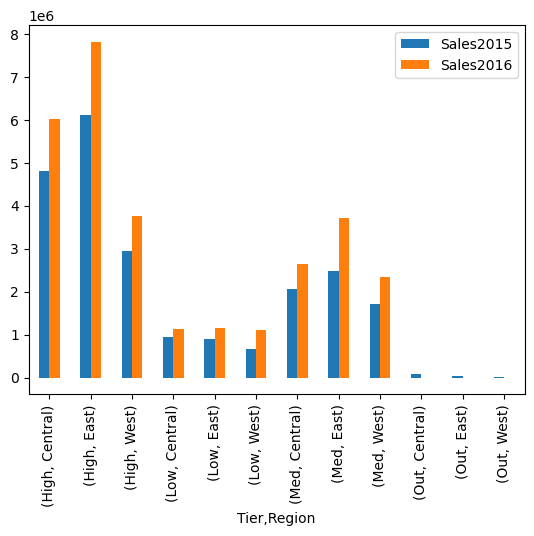

In [401]:
sales_data_summ = sales_data.groupby(['Tier','Region'])[['Sales2015','Sales2016']].sum()
sales_data_summ.plot(kind = 'bar')

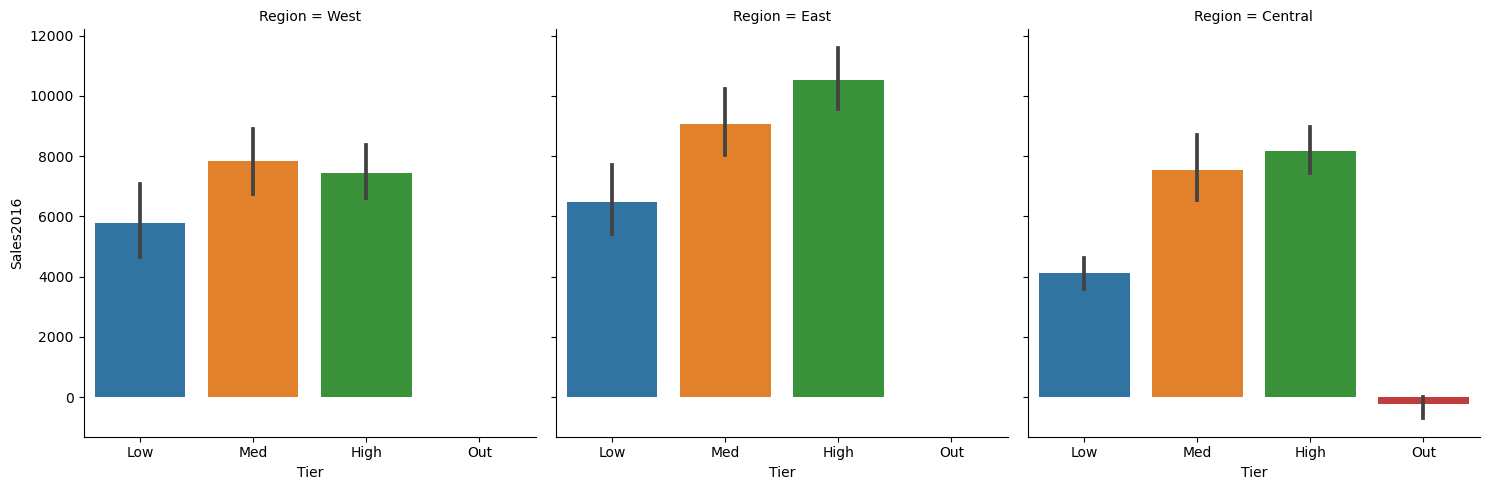

In [177]:

sns.catplot(sales_data,kind ='bar',x = 'Tier' ,y = 'Sales2016' ,col = 'Region')

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

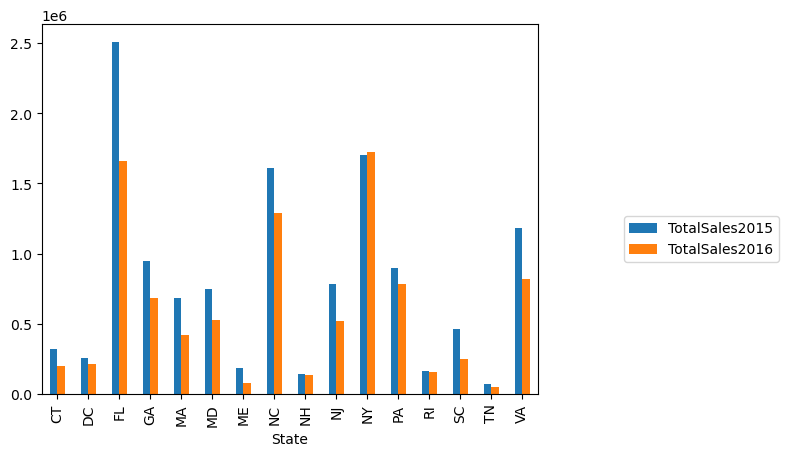

In [283]:
summary_sales_data = sales_data.loc[(sales_data.Region == 'East'),['Sales2016','Sales2015','State']]
decline_sales_data = summary_sales_data.groupby('State')[['Sales2016','Sales2015']].sum()
decline_sales_data.plot(kind = 'bar')
plt.legend(['TotalSales2015','TotalSales2016'],bbox_to_anchor=(1.5,0.5))

In [227]:
decline_sales_data
print("In East region NY has registered a decline in sales")

In East region NY has registered a decline in sales


#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

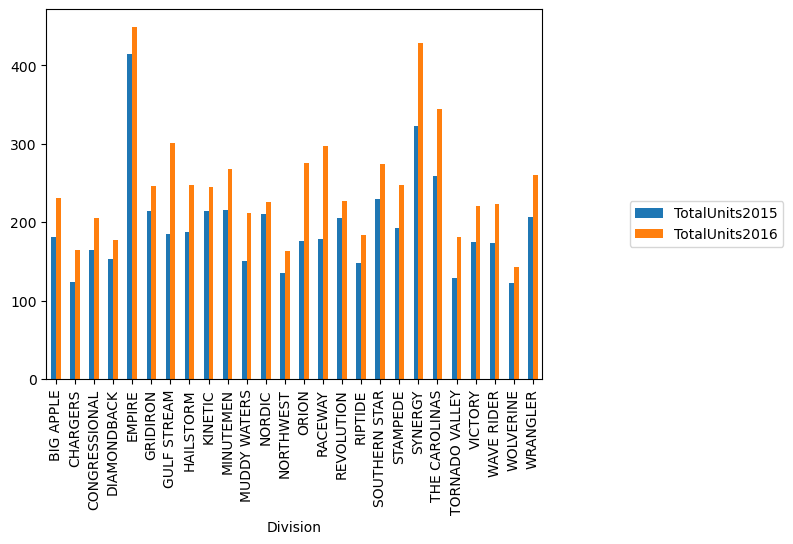

In [281]:
summary_sales_units = sales_data.loc[(sales_data.Tier == 'High'),['Units2015','Units2016','Division']]
decline_sales_units = summary_sales_units.groupby('Division')[['Units2015','Units2016']].sum()
decline_sales_units.plot(kind = 'bar')
plt.legend(['TotalUnits2015','TotalUnits2016'],bbox_to_anchor=(1.5,0.5))

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
    • Jan - Mar : Q1
    • Apr - Jun : Q2
    • Jul - Sep : Q3
    • Oct - Dec : Q4

In [245]:
sales_data['Qtr'] = np.where(sales_data.Month.isin(['Jan','Feb','Mar']),'Q1',
                             np.where(sales_data.Month.isin(['Apr','May','Jun']),'Q2',
                                      np.where(sales_data.Month.isin(['Jul','Aug','Sep']),'Q3','Q4')))

In [247]:
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


#### 7.Compare Qtr wise sales in 2015 and 2016 in a bar plot

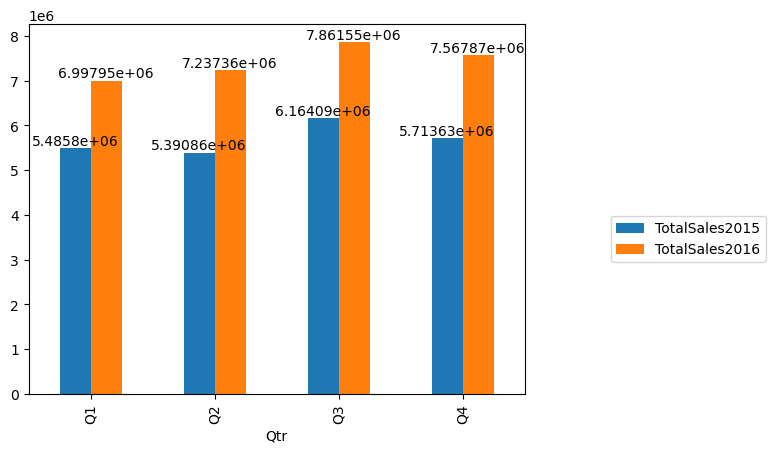

In [279]:
qtr_sales = sales_data.groupby('Qtr')[['Sales2015','Sales2016']].sum()
qtr_sale_bar = qtr_sales.plot(kind ='bar')
plt.legend(['TotalSales2015','TotalSales2016'],bbox_to_anchor=(1.5,0.5))
plt.xlabel('Qtr')
for container in qtr_sale_bar.containers:
    qtr_sale_bar.bar_label(container)
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. 
    (Draw 4 pie charts representing a Quarter for each Tier) 

array([<Axes: ylabel='Q1'>, <Axes: ylabel='Q2'>, <Axes: ylabel='Q3'>,
       <Axes: ylabel='Q4'>], dtype=object)

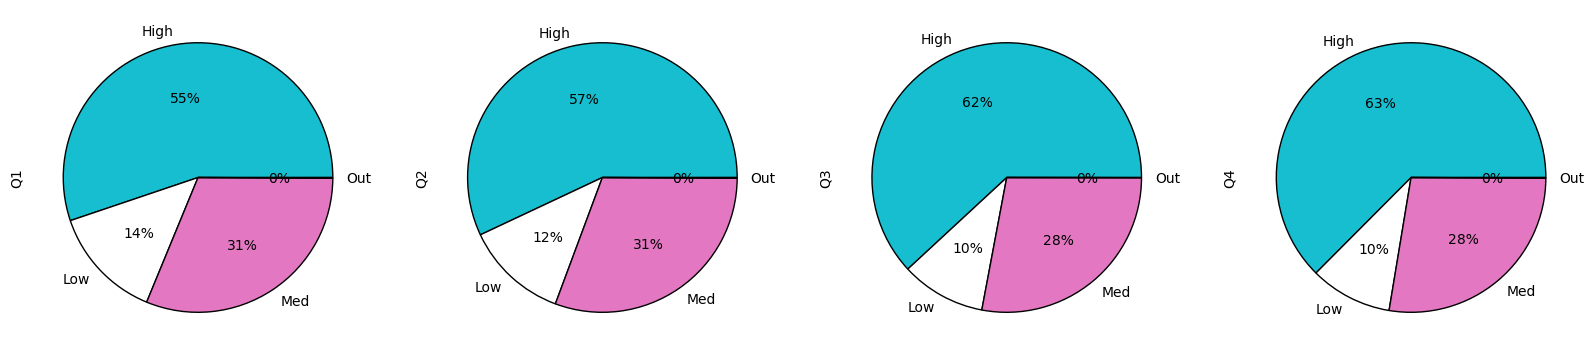

In [397]:
sum_qtr = pd.pivot_table(sales_data,index = 'Tier',columns = 'Qtr',values = 'Sales2016',aggfunc ='sum')
# Adding 5000 to increase the values in all the rows so that the ratio remains the same.
sum_qtr.Q3 = sum_qtr.Q3 + 5000
colors = ['#17becf','w','#e377c2']
sum_qtr.plot(kind ='pie',autopct = '%.f%%',subplots = True,legend =False,figsize = (20,13),wedgeprops ={'edgecolor':'black'},colors = colors)